# Homework text analysis

## "Hip hop's changing attitudes towards women over time"

In [1]:
import glob
%matplotlib inline
filenames = glob.glob('hip-hop/*/*')
filenames[:5]

['hip-hop/1965/a-change-is-gonna-come-sam-cooke',
 'hip-hop/1965/a-lovers-concerto-the-toys',
 'hip-hop/1965/a-woman-can-change-a-man-joe-tex',
 'hip-hop/1965/a-womans-love-carla-thomas',
 'hip-hop/1965/aint-that-peculiar-marvin-gaye']

## Reading in the files using a list comprehension

In [2]:
contents = [open(filename).read() for filename in filenames]
len(contents)

7458

## Use the filenames and the contents to build a dataframe

In [3]:
import pandas as pd

df = pd.DataFrame({
    'lyrics': contents,
    'filename': filenames
})
df.head()

,filename,lyrics
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...
3,hip-hop/1965/a-womans-love-carla-thomas,When I ask you where you've been\nDon't get an...
4,hip-hop/1965/aint-that-peculiar-marvin-gaye,[Verse 1]\nHoney you do me wrong but still I'm...


## Extract the year into a different column

In [4]:
# expand=False just gets rid of a warning
df['year'] = df.filename.str.extract('hip-hop/(\d*)/', expand=False)
df.head(2)

,filename,lyrics,year
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...,1965
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965


In [8]:
df['datetime'] = pd.to_datetime(df['year'], format="%Y")
df.head(2)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys


## Extract the artist and song name into another column

In [6]:
df['title-artist'] = df.filename.str.extract('hip-hop/\d*/(.*)', expand=False)
df.head(2)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,[Verse 1]\nI was born by the river\nIn a littl...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys


## Cleaning up

In [7]:
df['lyrics'] = df['lyrics'].replace("\[.*?\]", "", regex=True).str.strip()
df.head(2)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys



# Text analysis


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
#make a new count vectorizer
vec = CountVectorizer(vocabulary=['woman', 'girl', 'pussy', 'bitch', 'shorty', 'shawty', 'dime', 'gal'])
#say hey vectorizer, please read our stuff
matrix = vec.fit_transform(df['lyrics'])

results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results.head()

,woman,girl,pussy,bitch,shorty,shawty,dime,gal
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0
3,14,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [35]:
results['woman'].describe()

count    7458.000000
mean        0.244570
std         2.139493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       102.000000
Name: woman, dtype: float64

In [10]:
results['girl'].describe()

count    7458.000000
mean        1.575892
std         3.536805
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        63.000000
Name: girl, dtype: float64

In [13]:
results['pussy'].describe()

count    7458.000000
mean        0.099356
std         0.730142
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        31.000000
Name: pussy, dtype: float64

In [14]:
results['bitch'].describe()

count    7458.000000
mean        0.429740
std         2.235549
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        64.000000
Name: bitch, dtype: float64

In [12]:
results['shorty'].describe()

count    7458.000000
mean        0.091043
std         0.986375
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        39.000000
Name: shorty, dtype: float64

In [15]:
results['shawty'].describe()

count    7458.000000
mean        0.107670
std         1.015142
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        50.000000
Name: shawty, dtype: float64

In [19]:
results['dime'].describe()

count    7458.000000
mean        0.028158
std         0.264600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: dime, dtype: float64

In [21]:
results['gal'].describe()

count    7458.000000
mean        0.024269
std         0.842308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        65.000000
Name: gal, dtype: float64

In [22]:
df.head(3)

,filename,lyrics,year,datetime,title-artist
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...,1965,1965-01-01,a-woman-can-change-a-man-joe-tex


In [37]:
df['woman'] = results['woman']
df['girl'] = results['girl']
df['pussy'] = results['pussy']
df['bitch'] = results['bitch']
df['shorty'] = results['shorty']
df['shawty'] = results['shawty']
df['dime'] = results['dime']
df['gal'] = results['gal']
df.head()

,filename,lyrics,year,datetime,title-artist,girl,pussy,bitch,shorty,shawty,dime,gal,woman
0,hip-hop/1965/a-change-is-gonna-come-sam-cooke,I was born by the river\nIn a little tent\nAnd...,1965,1965-01-01,a-change-is-gonna-come-sam-cooke,0,0,0,0,0,0,0,0
1,hip-hop/1965/a-lovers-concerto-the-toys,How gentle is the rain\nThat falls softly on t...,1965,1965-01-01,a-lovers-concerto-the-toys,0,0,0,0,0,0,0,0
2,hip-hop/1965/a-woman-can-change-a-man-joe-tex,A man can say what he won't do\nBut if she rea...,1965,1965-01-01,a-woman-can-change-a-man-joe-tex,0,0,0,0,0,0,0,5
3,hip-hop/1965/a-womans-love-carla-thomas,When I ask you where you've been\nDon't get an...,1965,1965-01-01,a-womans-love-carla-thomas,0,0,0,0,0,0,0,14
4,hip-hop/1965/aint-that-peculiar-marvin-gaye,Honey you do me wrong but still I'm crazy abou...,1965,1965-01-01,aint-that-peculiar-marvin-gaye,0,0,0,0,0,0,0,0


In [38]:
df.groupby('year')['woman'].sum()

year
1965     47
1966     64
1967     46
1968     60
1969     49
1970     36
1971     57
1972     69
1973     32
1974     80
1975     23
1976      0
1977     23
1978     22
1979     17
1980      6
1981     32
1982     61
1983     18
1984     35
1985     10
1986      6
1987      5
1988      4
1989     10
1990      8
1991     26
1992     52
1993     43
1994     51
1995     15
1996     18
1997     10
1998     11
1999     31
2000     42
2001     84
2002     85
2003     49
2004     51
2005     19
2006     33
2007    125
2008    129
2009     23
2010     15
2011     40
2012     15
2013     10
2014      5
2015     16
2016      6
2017      0
Name: woman, dtype: int64

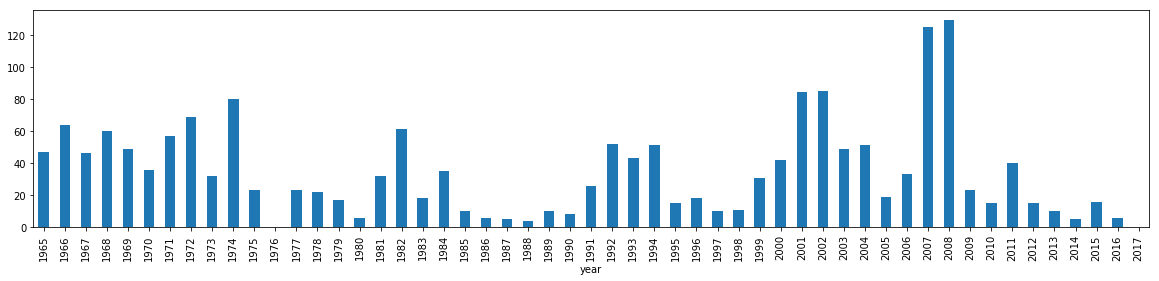

In [39]:
df.groupby('year')['woman'].sum().plot(kind='bar', figsize=(20,4))

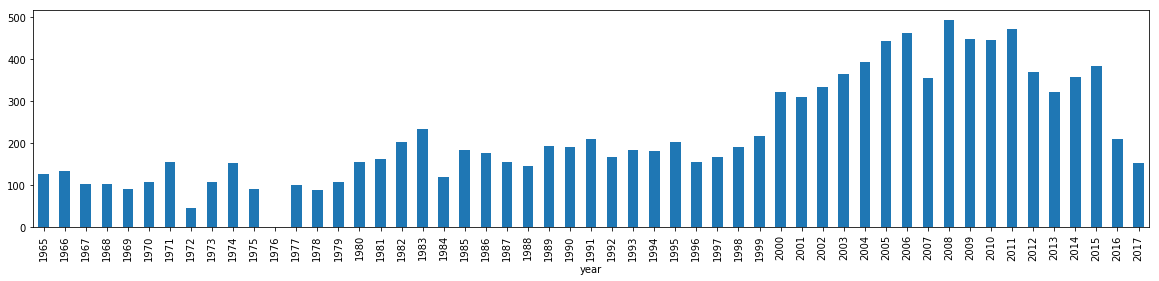

In [26]:
df.groupby('year')['girl'].sum().plot(kind='bar', figsize=(20,4))

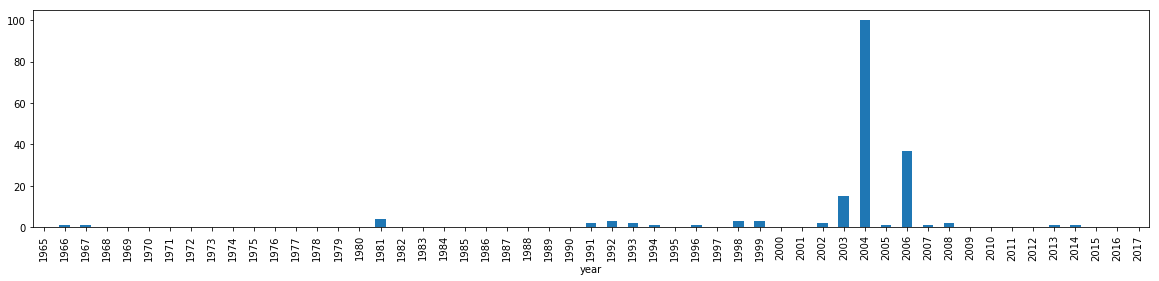

In [32]:
df.groupby('year')['gal'].sum().plot(kind='bar', figsize=(20,4))

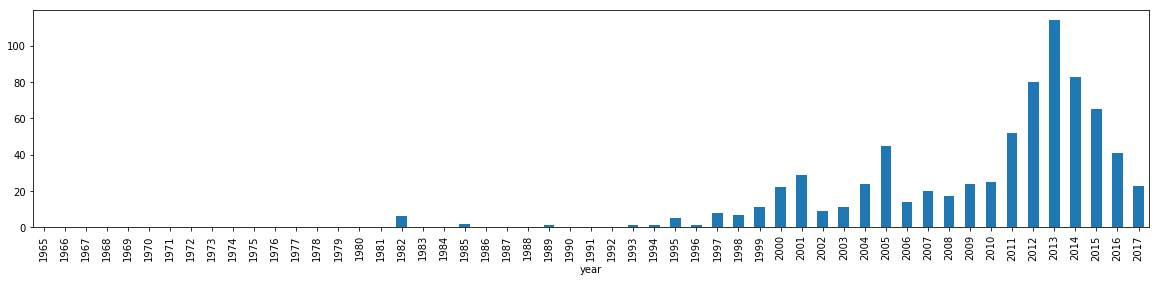

In [27]:
df.groupby('year')['pussy'].sum().plot(kind='bar', figsize=(20,4))

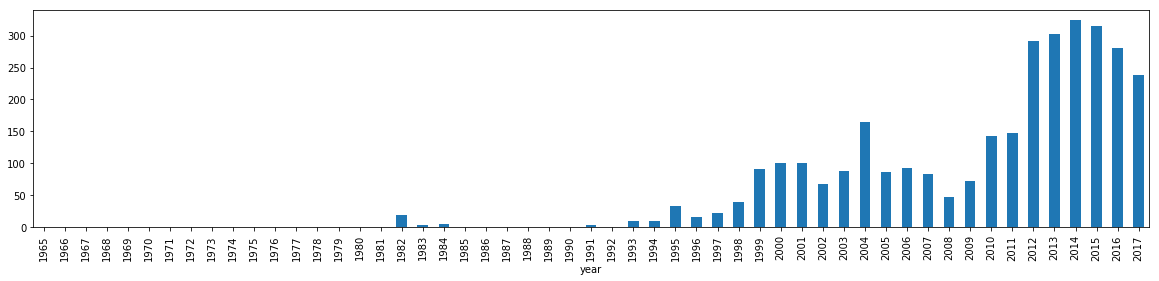

In [28]:
df.groupby('year')['bitch'].sum().plot(kind='bar', figsize=(20,4))

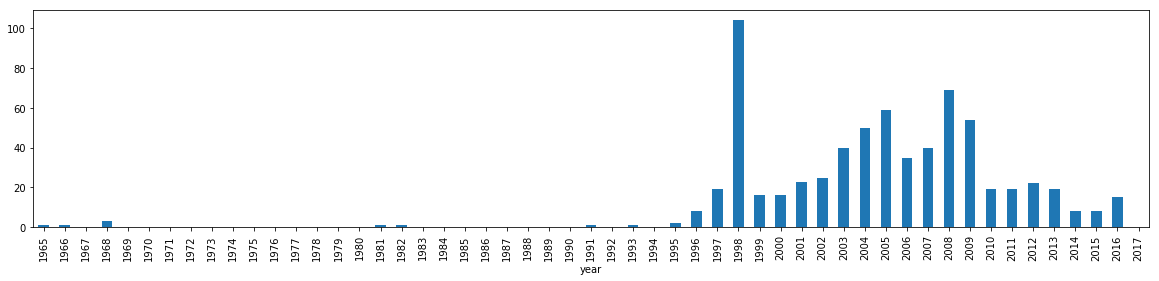

In [29]:
df.groupby('year')['shorty'].sum().plot(kind='bar', figsize=(20,4))

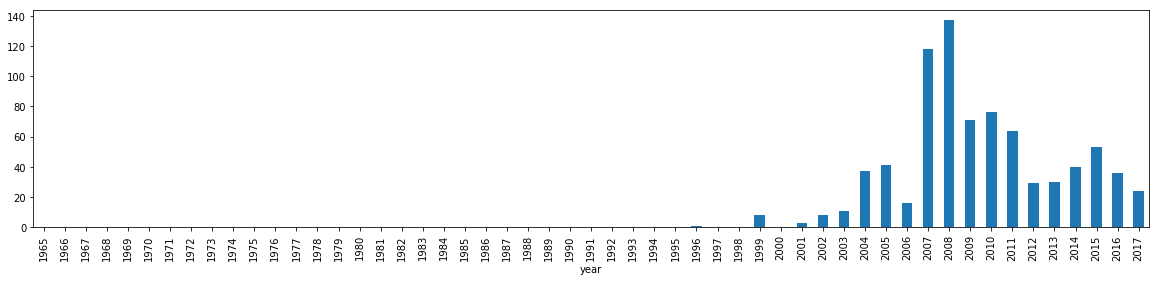

In [31]:
df.groupby('year')['shawty'].sum().plot(kind='bar', figsize=(20,4))